In [27]:
# import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# sns.set_style("whitegrid")

from attrdict import AttrDict
from drivers import *
import os
import seaborn as sns
import results

<AxesSubplot:xlabel='NS', ylabel='ACC'>

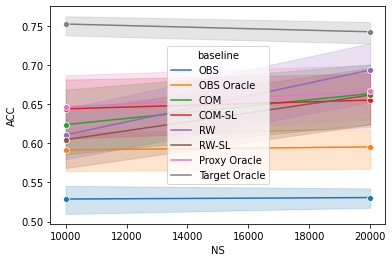

In [28]:
df, meandf  = results.get_erm_convergence_result_df('erm_convergence_rates_debug')

df.reset_index(inplace=True)
sns.lineplot(data=df, x="NS", y="ACC", hue='baseline', ci=95, marker='o')

In [30]:
df[]

,index,Unnamed: 0,alpha_0,alpha_1,beta_0,beta_1,alpha_0_hat,beta_0_hat,benchmark,NS,AU-ROC,ACC,do,baseline
0,0,0,0.1,0,0.3,0,0.160578,0.344577,synthetic_1D_sinusoidal,20000,0.584110,0.532167,0,OBS
1,1,1,0.1,0,0.3,0,0.160578,0.344577,synthetic_1D_sinusoidal,20000,0.663139,0.609833,0,OBS Oracle
2,2,2,0.1,0,0.3,0,0.160578,0.344577,synthetic_1D_sinusoidal,20000,0.762251,0.706167,0,COM
3,3,3,0.1,0,0.3,0,0.160578,0.344577,synthetic_1D_sinusoidal,20000,0.830447,0.756667,0,COM-SL
4,4,4,0.1,0,0.3,0,0.160578,0.344577,synthetic_1D_sinusoidal,20000,0.684172,0.535500,0,RW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,115,115,0.3,0,0.1,0,0.262576,0.287824,synthetic_1D_sinusoidal,10000,0.666715,0.545333,0,COM-SL
236,116,116,0.3,0,0.1,0,0.262576,0.287824,synthetic_1D_sinusoidal,10000,0.739506,0.554667,0,RW
237,117,117,0.3,0,0.1,0,0.262576,0.287824,synthetic_1D_sinusoidal,10000,0.709871,0.568000,0,RW-SL
238,118,118,0.3,0,0.1,0,0.262576,0.287824,synthetic_1D_sinusoidal,10000,0.794254,0.562667,0,Proxy Oracle


In [31]:
df.groupby(['NS', 'alpha_0','beta_0', 'baseline']).mean()

index  Unnamed: 0  alpha_1  beta_1  \
NS    alpha_0 beta_0 baseline                                            
10000 0.1     0.3    COM             18.0        18.0      0.0     0.0   
                     COM-SL          19.0        19.0      0.0     0.0   
                     OBS             16.0        16.0      0.0     0.0   
                     OBS Oracle      17.0        17.0      0.0     0.0   
                     Proxy Oracle    22.0        22.0      0.0     0.0   
                     RW              20.0        20.0      0.0     0.0   
                     RW-SL           21.0        21.0      0.0     0.0   
                     Target Oracle   23.0        23.0      0.0     0.0   
      0.2     0.2    COM             58.0        58.0      0.0     0.0   
                     COM-SL          59.0        59.0      0.0     0.0   
                     OBS             56.0        56.0      0.0     0.0   
                     OBS Oracle      57.0        57.0      0.0     0.0   
                     Proxy Oracle    62.0        62.0      0.0     0.0   
                     RW              60.0        60.0      0.0     0.0   
                     RW-SL           61.0        61.0      0.0     0.0   
                     Target Oracle   63.0        63.0      0.0     0.0   
      0.3     0.1    COM             98.0        98.0      0.0     0.0   
                     COM-SL          99.0        99.0      0.0     0.0   
                     OBS             96.0        96.0      0.0     0.0   
                     OBS Oracle      97.0        97.0      0.0     0.0   
                     Proxy Oracle   102.0       102.0      0.0     0.0   
                     RW             100.0       100.0      0.0     0.0   
                     RW-SL          101.0       101.0      0.0     0.0   
                     Target Oracle  103.0       103.0      0.0     0.0   
20000 0.1     0.3    COM             18.0        18.0      0.0     0.0   
                     COM-SL          19.0        19.0      0.0     0.0   
                     OBS             16.0        16.0      0.0     0.0   
                     OBS Oracle      17.0        17.0      0.0     0.0   
                     Proxy Oracle    22.0        22.0      0.0     0.0   
                     RW              20.0        20.0      0.0     0.0   
                     RW-SL           21.0        21.0      0.0     0.0   
                     Target Oracle   23.0        23.0      0.0     0.0   
      0.2     0.2    COM             58.0        58.0      0.0     0.0   
                     COM-SL          59.0        59.0      0.0     0.0   
                     OBS             56.0        56.0      0.0     0.0   
                     OBS Oracle      57.0        57.0      0.0     0.0   
                     Proxy Oracle    62.0        62.0      0.0     0.0   
                     RW              60.0        60.0      0.0     0.0   
                     RW-SL           61.0        61.0      0.0     0.0   
                     Target Oracle   63.0        63.0      0.0     0.0   
      0.3     0.1    COM             98.0        98.0      0.0     0.0   
                     COM-SL          99.0        99.0      0.0     0.0   
                     OBS             96.0        96.0      0.0     0.0   
                     OBS Oracle      97.0        97.0      0.0     0.0   
                     Proxy Oracle   102.0       102.0      0.0     0.0   
                     RW             100.0       100.0      0.0     0.0   
                     RW-SL          101.0       101.0      0.0     0.0   
                     Target Oracle  103.0       103.0      0.0     0.0   

                                    alpha_0_hat  beta_0_hat    AU-ROC  \
NS    alpha_0 beta_0 baseline                                           
10000 0.1     0.3    COM               0.237133    0.481345  0.756583   
                     COM-SL            0.237133    0.481345  0.757915   
                     OBS               0.23

In [3]:
from attrdict import AttrDict


exp_config = AttrDict({

    # Benchmark configuration
    'benchmark': {
        'name': 'synthetic_1D_sinusoidal',
        'NS': 1000,
        'config': {
            'Y0_PDF': 'piecewise_sinusoid',
            'Y1_PDF': 'low_base_rate_sinusoid',
            'PI_PDF': 'linear'
            }
    },

    'log_dir': 'results',

    'sample_sizes': [5000, 10000, 20000, 30000, 40000, 50000, 60000],
    
    # Experimental setup 
    'learn_weights': True,
    'learn_parameters': True,
    
    # Hyperparameters
    'n_epochs': 3,
    'n_runs': 1,
    
    'target_POs': [0],
    'policy_gamma': 0,
   
    # Data params
    'train_ratio': .7,
    'split_erm': True,
    'crossfit_erm': True,
    'split_ccpe': True,
    'crossfit_ccpe': True,

    'error_params': [{
        'alpha_0': 0.5,
        'alpha_1': 0,
        'beta_0': 0.1,
        'beta_1': 0 
    }],

    'baselines': [{
            'model': 'OBS',
            'target': 'Y',
            'conditional': False,
            'sl': False,
            'reweight': False
        },{
            'model': 'OBS Oracle',
            'target': 'YS',
            'conditional': False,
            'sl': False,
            'reweight': False
        },{
            'model': 'COM',
            'target': 'Y',
            'conditional': True,
            'sl': False,
            'reweight': False
        },{
            'model': 'COM-SL',
            'target': 'Y',
            'conditional': True,
            'sl': True,
            'reweight': False
        },{
            'model': 'RW',
            'target': 'Y',
            'conditional': True,
            'sl': False,
            'reweight': True
        },{
            'model': 'RW-SL',
            'target': 'Y',
            'conditional': True,
            'sl': True,
            'reweight': True
        },{
            'model': 'Proxy Oracle',
            'target': f'Y',
            'conditional': True,
            'sl': False,
            'reweight': False
        },{
            'model': 'Target Oracle',
            'target': f'YS',
            'conditional': True,
            'sl': False,
            'reweight': False
    }]
})

In [2]:
exp_config = AttrDict({
#     'benchmark': {
#         'name': 'synthetic_1D_sinusoidal',
#         'NS': 1000,
#         'config': {
#             'Y0_PDF': 'piecewise_sinusoid',
#             'Y1_PDF': 'low_base_rate_sinusoid',
#             'PI_PDF': 'linear'
#             }
#     },
    
    'benchmark': {
        'name': 'synthetic_2D_linsep',
        'NS': 5000,
        'config': {
            'Y0_PDF': '2D_linsep_baseline',
            'Y1_PDF': '2D_linsep_intervention',
            'PI_PDF': '6cov_linear'
        }
    },
    
    'log_dir': 'results',
    
    # Experimental setup 
    'learn_weights': True,
    'learn_parameters': True,
    
    # Hyperparameters
    'n_epochs': 3,
    'n_runs': 1,
    
    'target_POs': [0, 1],
    
    'policy_gamma': 0,
    'train_ratio': .7,
    
    'split_erm': True,
    'crossfit_erm': True,
    'split_ccpe': True,
    'crossfit_ccpe': True,
})

error_params = [AttrDict({
    'alpha_0': 0.5,
    'alpha_1': 0,
    'beta_0': 0.1,
    'beta_1': 0 
})]

# baselines = [AttrDict({
#     'model': 'OBS',
#     'target': 'Y',
#     'conditional': False,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'OBS Oracle',
#     'target': 'YS',
#     'conditional': False,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'COM',
#     'target': 'Y',
#     'conditional': True,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'COM-SL',
#     'target': 'Y',
#     'conditional': True,
#     'sl': True,
#     'reweight': False
# }), AttrDict({
#     'model': 'RW',
#     'target': 'Y',
#     'conditional': True,
#     'sl': False,
#     'reweight': True
# }), AttrDict({
#     'model': 'RW-SL',
#     'target': 'Y',
#     'conditional': True,
#     'sl': True,
#     'reweight': True
# }), AttrDict({
#     'model': 'Proxy Oracle',
#     'target': f'Y',
#     'conditional': True,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'Target Oracle',
#     'target': f'YS',
#     'conditional': True,
#     'sl': True,
#     'reweight': False
# })]
baselines = [AttrDict({
    'model': 'Target Oracle',
    'target': f'YS',
    'conditional': True,
    'sl': False,
    'reweight': False
})]

po_results, te_results =  run_risk_minimization_exp(exp_config, baselines, error_params, exp_name='synth_baseline_comparison')



AttributeError: 'AttrDict' instance has no attribute 'sample_sizes'

## Troubleshoot poor model fitting performance

In [3]:
from attrdict import AttrDict
from data import loaders
from model import MLP, train, evaluate
import numpy as np

In [17]:
benchmark =  AttrDict({
    'name': 'synthetic_1D_sinusoidal',
    'NS': 25000,
    'config': {
        'Y0_PDF': 'piecewise_sinusoid',
        'Y1_PDF': 'low_base_rate_sinusoid',
        'PI_PDF': 'linear'
        }
})

error_params = AttrDict({
    'alpha_0': 0.3,
    'alpha_1': 0,
    'beta_0': 0.1,
    'beta_1': 0 
})

for i in range(2):

    X_train, X_test, Y_train, Y_test = loaders.get_benchmark(benchmark, error_params, 30000)

    train_loader, test_loader = loaders.get_loaders(
        X_train=X_train,
        YCF_train=Y_train,
        X_test=X_test,
        YCF_test=Y_test,
        target='Y', 
        do=0,
        conditional=True
    )

    loss_config = AttrDict({
            'alpha': None,
            'beta':  None,
            'do': 0,
            'reweight': False
        })


    eta_model = MLP(n_feats=X_train.shape[1])
    train_losses = train(eta_model, train_loader, loss_config=loss_config, n_epochs=10, lr=.005, desc="Proxy Oracle")
    metrics, py_hat  = evaluate(eta_model, test_loader)

    print('train_loss', train_losses)
    print('metrics:', metrics)
    print('alpha hat:', error_params['alpha_0'] - py_hat.min())
    print('beta hat:', error_params['beta_0'] - (1-py_hat.max()))
    
    

Proxy Oracle: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.05s/it]


train_loss [221.85189658403397, 221.3044871687889, 221.75150734186172, 217.82041156291962, 215.86875063180923, 212.88977718353271, 211.449484705925, 209.23809170722961, 207.3772241473198, 207.40917485952377]
metrics: {'AU-ROC': 0.702379454378814, 'ACC': 0.6498888888888888, 'loss': 0.6302460755439515}
alpha hat: 0.00227566361427306
beta hat: -0.05752065181732177


Proxy Oracle: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.01it/s]


train_loss [221.16258996725082, 217.47730696201324, 214.03430902957916, 210.73106983304024, 208.15274795889854, 207.03631472587585, 206.80688032507896, 206.8958286345005, 207.099842607975, 206.94597604870796]
metrics: {'AU-ROC': 0.7688840066806089, 'ACC': 0.631, 'loss': 0.6280956812572818}
alpha hat: -0.026726585626602184
beta hat: -0.027056598663330073


In [18]:

val_preds = pd.DataFrame({
    'yhat': py_hat.squeeze(),
    'y': Y_test['pYS_0'].squeeze(),
    'x': X_test.squeeze()
})

val_preds = val_preds.sort_values(by='x')

In [19]:
print(metrics)

{'AU-ROC': 0.7688840066806089, 'ACC': 0.631, 'loss': 0.6280956812572818}


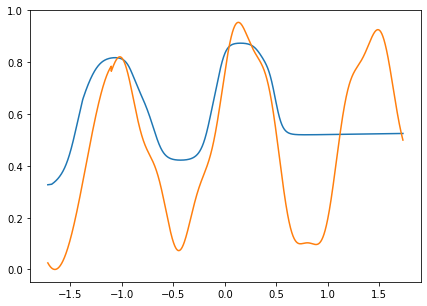

In [20]:
f, axs = plt.subplots(1, 1, sharey=False, figsize=(7,5))
axs.plot(val_preds['x'], val_preds['yhat'], label=f'$\eta^*$')
axs.plot(val_preds['x'], val_preds['y'], label=f'$\eta$')

In [8]:
val_preds['yhat'].max()
val_preds['yhat'].min()

0.24906175

In [ ]:
def viz_ccpe_estimates(Y_train, Y_test, debug_info, alpha, beta, do, y0_pdf, y1_pdf, pi_pdf):

    X = expdf['X'].to_numpy()
    pdf = y0_pdf if do==0 else y1_pdf
    eta_d_star = eta(X, pdf)
    eta_d = ccn_model(eta_d_star, alpha, beta)
    pix = pi(X, pi_pdf)

    f, axs = plt.subplots(1, 1, sharey=False, figsize=(7,5))

    # Class probability functions
    axs.plot(X, eta_d_star, label=f'$\eta^*_{do}(x)$')
    axs.plot(X, eta_d, label=f'$\eta_{do}(x)$', color='black')
    axs.plot(X, pix, label='$\pi(x)$', color='orange', linestyle='--')
    plt.scatter(debug_info['val_x'], debug_info['val_py'], marker='x', color='black', label=f'$\hat\eta_{do}(x)$')
    plt.legend(bbox_to_anchor=(1.2, 1))
    plt.xlabel('X')
    plt.ylabel('P')

    plt.title(f'risk under D={do}, alpha={alpha:2}, beta={beta:2}')


In [ ]:
viz_ccpe_estimates()